# RMS as a function of time

A time-rms plot which includes 
- rms bune itt against time
- rms water itt against time
- rms bone model against time
- rms water model against time

In [13]:
import pickle 
import matplotlib.pyplot as plt
import numpy as np

objectSize = 32


with open('phantom_results_2.pkl', 'rb') as f:
    data = pickle.load(f)

reconstructions = data['reconstructions']
ys = data['ys']
phantoms = data['phantoms']
model_images = data['output_images']
times = data['times']
times_model = data['times_images']
rms_itt_bone = data['rms_reconstructions_bone']
rms_itt_water = data['rms_reconstructions_water']
rms_model_bone = data['rms_models_bone']
rms_model_water = data['rms_models_water']


In [14]:
def rms_error(image1, image2):
    if image1.shape != image2.shape:
        raise ValueError("Images must have the same dimensions")

    # Calculate the squared differences
    squared_diff = (image1 - image2) ** 2

    # Calculate the mean of the squared differences
    mean_squared_diff = np.mean(squared_diff)

    # Return the square root of the mean squared difference
    return np.sqrt(mean_squared_diff)

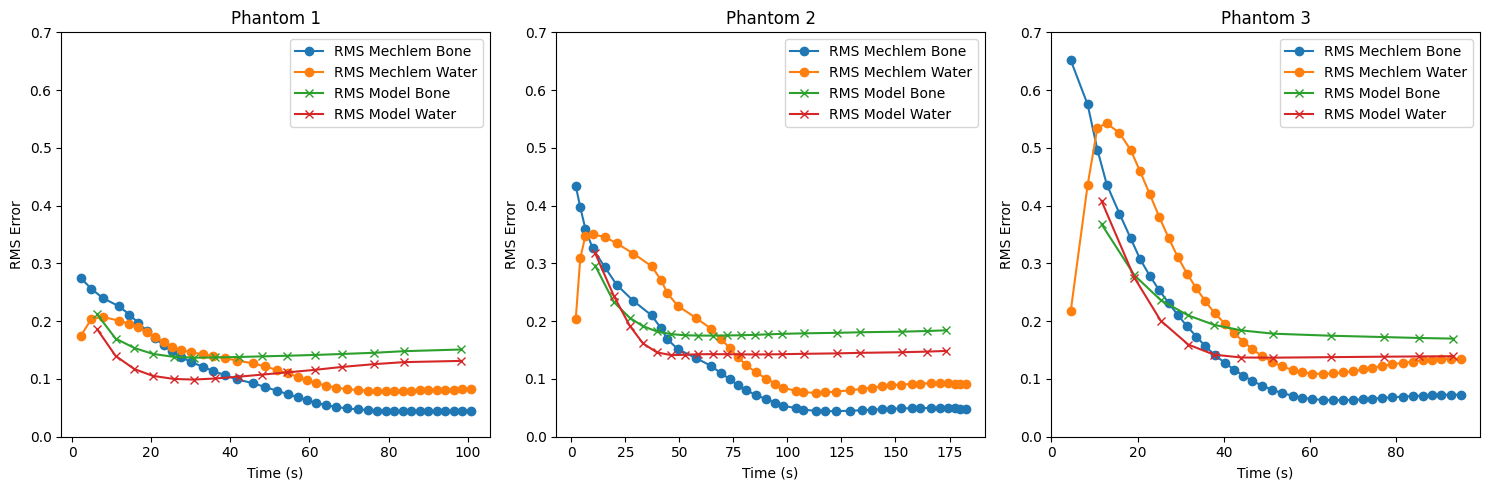

In [15]:
# | label: rmsTimePlot
# calculate RMS for reconstructed images

rms_reconstructions_bone = []
rms_reconstructions_water = []
rms_models_bone = []
rms_models_water = []

for reconstruction, output_image, phantom in zip(reconstructions, model_images, phantoms): 

    rms_recon_bone = []
    rms_recon_water = []
    rms_model_bone = []
    rms_model_water = []

    phantom_bone = phantom[0].transpose()  # Get the ith bone
    phantom_water = phantom[1].transpose()  # Get the ith water

    # get first image from reconstruction
    _, nMats, nIterates = reconstruction.shape
    images = reconstruction.reshape((objectSize, objectSize, objectSize, nMats, nIterates), order = 'F')

    for i in range(len(images[0, 0, 0, 0, :])):
        image_bone = images[:, :, :, 0, i]
        image_water = images[:, :, :, 1, i]
        rms_recon_bone.append(rms_error(image_bone, phantom_bone))
        rms_recon_water.append(rms_error(image_water, phantom_water))
    rms_reconstructions_bone.append(rms_recon_bone)
    rms_reconstructions_water.append(rms_recon_water)

    for image_bone, image_water in output_image:
        rms_model_bone.append(rms_error(image_bone, phantom_bone))
        rms_model_water.append(rms_error(image_water, phantom_water))
    rms_models_bone.append(rms_model_bone)
    rms_models_water.append(rms_model_water)

# we only want te keep the values for the models which are inside the time of the recon
for i in range(len(times_model)):
    times_model[i] = [t for t in times_model[i] if t <= max(times[i])]
# and the same for the RMS values
for i in range(len(rms_models_bone)):
    rms_models_bone[i] = rms_models_bone[i][:len(times_model[i])]
    rms_models_water[i] = rms_models_water[i][:len(times_model[i])]



# Plot the RMS errors for the reconstructions and the models
# make subplot with 1 row and len(reconstructions) columns
# plot them against the times
plt.figure(figsize=(15, 5))
for i in range(3):
    time_model = np.array(times_model[i])
    time_recon = np.array(times[i])
    plt.subplot(1, len(reconstructions), i + 1)
    plt.plot(time_recon, rms_reconstructions_bone[i], label='RMS Mechlem Bone', marker='o')
    plt.plot(time_recon, rms_reconstructions_water[i], label='RMS Mechlem Water', marker='o')
    plt.plot(time_model, rms_models_bone[i], label='RMS Model Bone', marker='x')
    plt.plot(time_model, rms_models_water[i], label='RMS Model Water', marker='x')
    plt.xlabel('Time (s)')
    plt.ylabel('RMS Error')
    plt.ylim([0,0.7])
    plt.title(f'Phantom {i + 1}')
    plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# | label : inspection
# import interactive slider for displaying images
from ipywidgets import interact, IntSlider


with open('phantom_results_3.pkl', 'rb') as f:
    data = pickle.load(f)

reconstructions = data['reconstructions']
ys = data['ys']
phantoms = data['phantoms']
model_images = data['output_images']
times = data['times']
times_model = data['times_images']
rms_itt_bone = data['rms_reconstructions_bone']
rms_itt_water = data['rms_reconstructions_water']
rms_model_bone = data['rms_models_bone']
rms_model_water = data['rms_models_water']

# loop through reconstructions and display the last bone and water images
# use slider for index in reconstructions array
def display_reconstruction_images(index):
    phantom_bone = phantoms[index][0].transpose()  # Get the ith bone
    phantom_water = phantoms[index][1].transpose()  # Get the ith water


    reconstruction = reconstructions[index]
    _, nMats, nIterates = reconstruction.shape
    images = reconstruction.reshape((objectSize, objectSize, objectSize, nMats, nIterates), order='F')

    fig, ax = plt.subplots(2, 2, figsize=(10, 5))
    ax[0,0].imshow(images[:,:,objectSize // 2, 0, -1], cmap='gray')
    ax[0, 0].set_title('Phantom Bone')
    ax[0, 0].axis('off')
    ax[0, 1].imshow(images[:,:,objectSize // 2, 1, -1], cmap='gray')
    ax[0, 1].set_title('Phantom Water')
    ax[1, 0].imshow(model_images[index][2][0][:, :, objectSize // 2], cmap='gray')
    ax[1, 0].set_title('Model Bone')
    ax[1, 1].imshow(model_images[index][2][1][:, :, objectSize // 2], cmap='gray')
    ax[1, 1].set_title('Model Water')

    plt.show()

interact(display_reconstruction_images,index=IntSlider(min=0, max=len(reconstructions)-1, step=1, value=16, description='Phantom Index'))


interactive(children=(IntSlider(value=16, description='Phantom Index', max=19), Output()), _dom_classes=('widg…

<function __main__.display_reconstruction_images(index)>

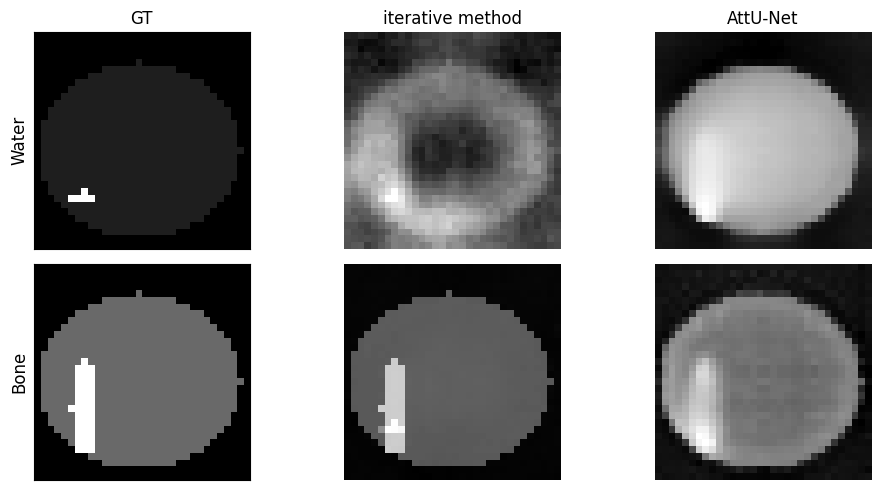

In [34]:
# | label: wrong_reconstruction

# display phantom 16, make 2x2 plot with the phantom, model and iterative. one row bone one row water
phantom_index = 16
phantom_bone = phantoms[phantom_index][0].transpose()  # Get the ith bone
phantom_water = phantoms[phantom_index][1].transpose()  # Get

# the ith water
reconstruction = reconstructions[phantom_index]
_, nMats, nIterates = reconstruction.shape
images = reconstruction.reshape((objectSize, objectSize, objectSize, nMats, nIterates), order='F')
water_reconstruction = images[:, :, :, 1, -1]
bone_reconstruction = images[:, :, :, 0, -1]

model_bone = model_images[phantom_index][2][0][:, :, objectSize // 2]
model_water = model_images[phantom_index][2][1][:, :, objectSize // 2]

fig, ax = plt.subplots(2, 3, figsize=(10, 5))
ax[1, 0].imshow(phantom_bone[:, :, objectSize // 2], cmap='gray')
ax[0, 0].imshow(phantom_water[:, :, objectSize // 2], cmap='gray')
ax[0, 0].set_title('GT')
ax[1, 1].imshow(bone_reconstruction[:, :, objectSize // 2], cmap='gray')
ax[1, 1].axis('off')
ax[1, 2].imshow(model_bone, cmap='gray')
# turn of axis numbers
ax[1,2].set_xlabel('')
ax[1, 2].axis('off')
ax[0, 2].imshow(model_water, cmap='gray')
ax[0, 2].set_title('AttU-Net')
ax[0, 2].axis('off')
ax[0, 1].imshow(water_reconstruction[:, :, objectSize // 2], cmap='gray')
ax[0, 1].set_title('iterative method')
ax[0, 1].axis('off')
ax[0, 0].set_ylabel('Water', fontsize=12)
ax[1, 0].set_ylabel('Bone', fontsize=12)
ax[0, 0].set_xticks([])
ax[0, 0].set_yticks([])
ax[1, 0].set_xticks([])
ax[1, 0].set_yticks([])
plt.tight_layout()
plt.show()